In [28]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [125]:
base_dir = '/home/shiva/GitRepos/indoor_drone_experimentation/kimera_local_eval/checking_jitter/'
location_to_delta_file = base_dir + 'jaka_script_imu.csv'

In [126]:
df = pd.read_csv(location_to_delta_file)

In [127]:
df.head(10)

,timestamp [ns],time_deltas [ns]
0,1728054994576087040,3897856
1,1728054994580187136,4100096
2,1728054994583865856,3678720
3,1728054994587971072,4105216
4,1728054994591682048,3710976
5,1728054994595785984,4103936
6,1728054994599461120,3675136
7,1728054994603565056,4103936
8,1728054994607273984,3708928
9,1728054994611352064,4078080


In [128]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   timestamp [ns]    10000 non-null  int64
 1   time_deltas [ns]  10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


In [129]:
df[df['time_deltas [ns]'] > 6000000.0]

,timestamp [ns],time_deltas [ns]
2942,1728055006047650048,7984128
3236,1728055007197351936,7618048
6184,1728055018691716864,8015872
6478,1728055019841231104,7582208
9721,1728055032484265216,7586048


In [130]:
to_investigate = df.iloc[2940:2950]

<Axes: ylabel='timestamp [ns]'>

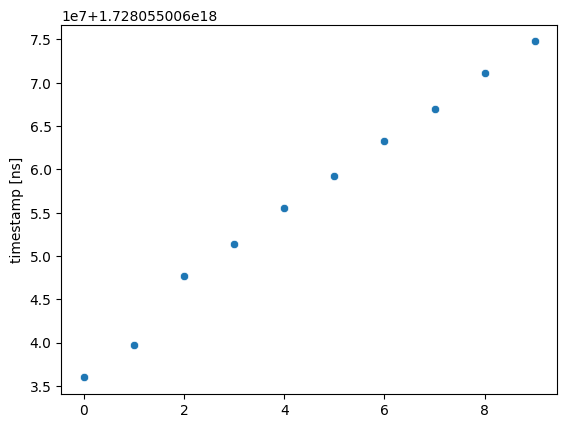

In [131]:
sns.scatterplot(data=to_investigate, x=range(10), y='timestamp [ns]')

<Axes: ylabel='time_deltas [ns]'>

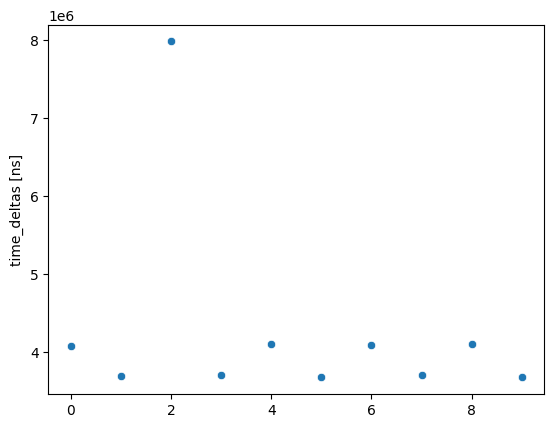

In [132]:
sns.scatterplot(data=to_investigate, x=range(10), y='time_deltas [ns]')

In [133]:
summary_results = df['time_deltas [ns]'].describe()
print(summary_results)

count    1.000000e+04
mean     3.899563e+06
std      2.167019e+05
min      3.380224e+06
25%      3.705088e+06
50%      3.903104e+06
75%      4.103936e+06
max      8.015872e+06
Name: time_deltas [ns], dtype: float64


In [134]:
time_deltas_ns = df['time_deltas [ns]'].values

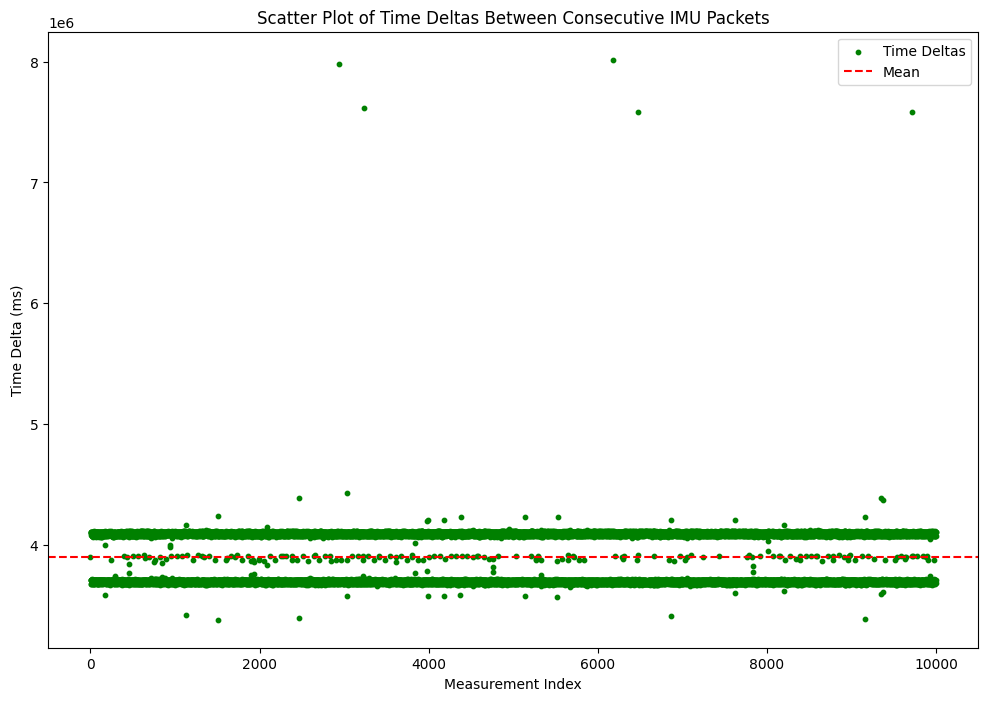

In [135]:
plt.figure(figsize=(12, 8))
plt.scatter(range(len(time_deltas_ms)), time_deltas_ns, c='green', label='Time Deltas', s=10)
plt.axhline(summary_results['mean'], color='red', linestyle='--', label='Mean', xmin=0, xmax=1)
# plt.text(0, 0, f"Mean: {mean_delta:.2f} ms\nStd: {std_delta:.2f} ms", fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Measurement Index')
plt.ylabel('Time Delta (ms)')
plt.title('Scatter Plot of Time Deltas Between Consecutive IMU Packets')
plt.legend()
plt.show()